# Simplicity and Depression - K means 

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

In [ ]:
# To enable plotting graphs in Jupyter notebook
# %matplotlib inline 

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [2]:
#https://scikit-learn.org/stable/modules/clustering.html

In [3]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [4]:
mydata.head()

id  simplicity  fatalism  depression  adjsimp  adjfatal   adjdep
0   1     0.92983   0.35589     0.59870  0.75934   0.10673  0.41865
1   2     0.91097   1.18439     0.72787  0.72717   0.99915  0.51688
2   3     0.53366  -0.05837     0.53411  0.62176   0.03811  0.70699
3   4     0.74118   0.35589     0.56641  0.83522   0.42218  0.65639
4   5     0.53366   0.77014     0.50182  0.47697   0.81423  0.53518

In [7]:
mydata.shape

(82, 6)

In [5]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [8]:
mydata.describe()#.transpose() 

simplicity   fatalism  depression    adjsimp   adjfatal     adjdep
count   82.000000  82.000000   82.000000  82.000000  82.000000  82.000000
mean     1.000000   1.000000    1.000001   1.000000   1.000000   1.000000
std      0.500000   0.500001    0.500000   0.499999   0.500000   0.500000
min      0.250680  -0.058370    0.469530   0.235690   0.030120   0.234540
25%      0.656282   0.563010    0.566410   0.697958   0.731598   0.596565
50%      0.882665   0.977270    0.824750   0.968490   0.924290   0.967845
75%      1.269400   1.391520    1.373730   1.201790   1.299120   1.261750
max      2.854080   2.220030    2.245650   2.949770   2.249310   2.787630

In [9]:
mydata.isnull().sum()

simplicity    0
fatalism      0
depression    0
adjsimp       0
adjfatal      0
adjdep        0
dtype: int64

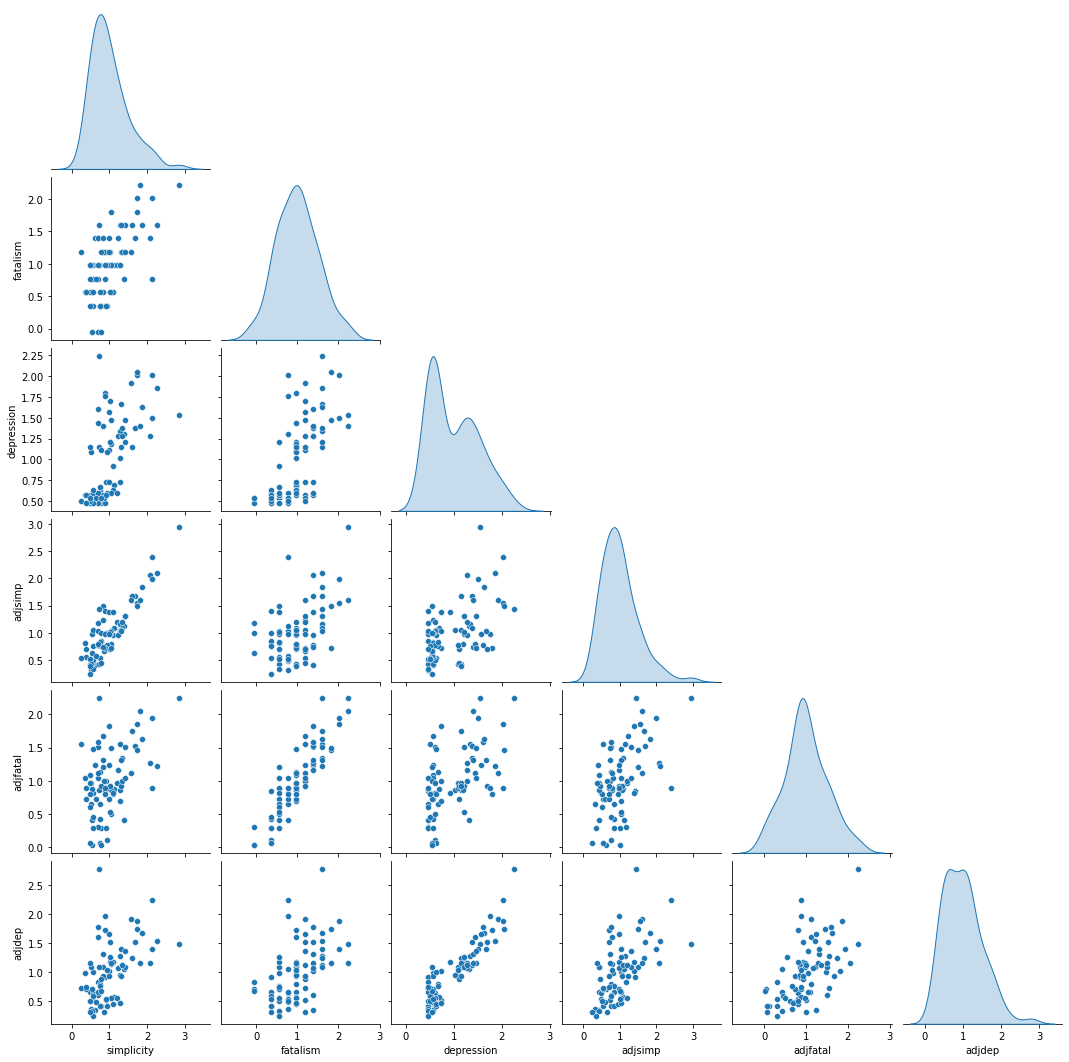

In [10]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde', corner = True) 

In [ ]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [ ]:
##Scale the data
#from scipy.stats import zscore # or standard scaler from sklearn.preprocessing

#mydata_z = mydata.apply(zscore)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# mydata_scaled = MinMaxScaler().fit_transform(mydata)

In [11]:
## OR you can use StandardScaler

from sklearn.preprocessing import StandardScaler 

mydata_scaled = StandardScaler().fit_transform(mydata)

In [12]:
mydata_scaled[0:5]

array([[-1.41204630e-01, -1.29614660e+00, -8.07540587e-01,
        -4.84282411e-01, -1.79753410e+00, -1.16985579e+00],
       [-1.79156757e-01,  3.71048210e-01, -5.47610712e-01,
        -5.49018441e-01, -1.70997121e-03, -9.72186724e-01],
       [-9.38420666e-01, -2.12976413e+00, -9.37515587e-01,
        -7.61136096e-01, -1.93561869e+00, -5.89626756e-01],
       [-5.20826522e-01, -1.29614660e+00, -8.72518026e-01,
        -3.31588286e-01, -1.16275146e+00, -6.91449566e-01],
       [-9.38420666e-01, -4.62549197e-01, -1.00249303e+00,
        -1.05249854e+00, -3.73826013e-01, -9.35361478e-01]])

In [13]:
df_scaled = pd.DataFrame(mydata_scaled, columns = mydata.columns.tolist())

In [14]:
df_scaled.head()

simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.141205 -1.296147   -0.807541 -0.484282 -1.797534 -1.169856
1   -0.179157  0.371048   -0.547611 -0.549018 -0.001710 -0.972187
2   -0.938421 -2.129764   -0.937516 -0.761136 -1.935619 -0.589627
3   -0.520827 -1.296147   -0.872518 -0.331588 -1.162751 -0.691450
4   -0.938421 -0.462549   -1.002493 -1.052499 -0.373826 -0.935361

In [15]:
mydata_z = df_scaled

In [16]:
#from sklearn.metrics import silhouette_score

In [17]:
km2 = KMeans(n_clusters=2)# default is 8
km2

KMeans(n_clusters=2)

In [18]:
km2.fit(mydata_z)

KMeans(n_clusters=2)

In [19]:
km2.cluster_centers_  # dim 6, c = 2

array([[ 0.86415274,  0.94595546,  1.11507784,  0.78060812,  0.85467985,
         1.036569  ],
       [-0.47283829, -0.51759827, -0.61013693, -0.4271252 , -0.46765501,
        -0.56717927]])

In [20]:
km2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
len(km2.labels_)

82

In [22]:
mydata_z.shape

(82, 6)

In [23]:
km3 = KMeans(n_clusters=3)

In [24]:
km3.fit(mydata_z)

KMeans(n_clusters=3)

In [25]:
km3.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2])

In [26]:
km2.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# from the earlier cluster, 1 seems to have broken into an additional cluster (0)
# 0 cluster from the previous model seems stable (1 in the next model)

3 clusters - 3 centroids
centroid 0 = x1a, x2, x3, x4, x5
centroid 1 = x1b, x2, x3, x4, x5
centroid 2 = x1c, x2, x3, x4, x5

In [27]:
km3.cluster_centers_ # size 3 (no of clusters) array - having 6 elements (6 columns/ 6 dimension) each

array([[-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533],
       [-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529]])

In [28]:
km3.cluster_centers_.shape, km2.cluster_centers_.shape

((3, 6), (2, 6))

In [29]:
from sklearn.metrics import silhouette_score

## HW: write your own custom function to find out the proper no of clusters

In [30]:
# can't use silhoutte for elblow method analysis -- close to 1 is the best cluster - better to use 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
sil = []
krange = list(range(2,11))
#krange = [int(i) for i in krange]
#print(krange)

for k in  krange:
    model = KMeans(n_clusters=k)
    model.fit(mydata_z)
    silhouette_avg = silhouette_score(mydata_z, model.labels_) ##
    
    print('Silhouette Score for %i Clusters: %0.4f' % (k, silhouette_avg))
    sil.append(silhouette_avg)


# plt.plot(krange, sil)
# plt.xlabel("$K$")
# plt.ylabel("Silhoutte score")
# plt.show()

Silhouette Score for 2 Clusters: 0.4194
Silhouette Score for 3 Clusters: 0.3237
Silhouette Score for 4 Clusters: 0.2935
Silhouette Score for 5 Clusters: 0.2633
Silhouette Score for 6 Clusters: 0.2582
Silhouette Score for 7 Clusters: 0.2304
Silhouette Score for 8 Clusters: 0.2397
Silhouette Score for 9 Clusters: 0.2410
Silhouette Score for 10 Clusters: 0.2425


In [ ]:
# sil is giving cluster 2

#### Elbow method

Inertia for  2 cluster 254.23175473344412
Inertia for  3 cluster 190.77308749675325
Inertia for  4 cluster 161.0947158296935
Inertia for  5 cluster 142.81112624181577
Inertia for  6 cluster 129.41793525038045
Inertia for  7 cluster 118.57638044021544
Inertia for  8 cluster 106.34190589704872
Inertia for  9 cluster 97.07028572432857
Inertia for  10 cluster 85.56011729514783
Inertia for  11 cluster 77.45087237909014
Inertia for  12 cluster 69.45053715612144


Text(0.5, 1.0, 'Selecting k with the Elbow Method using WCSS')

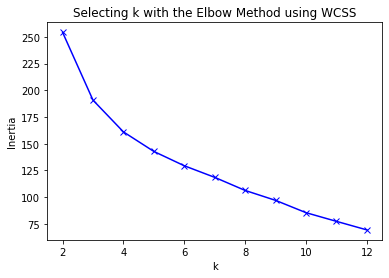

In [31]:
clusters=range(2,13)
wcss=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata_z)
    wc = model.inertia_
    wcss.append(wc) 
    print('Inertia for ',k,'cluster', wc)

plt.plot(clusters, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method using WCSS')

In [ ]:
# we will consider cluster 3 just for proceeding. ideally we will choose a diff algo

In [32]:
#Set the value of k=3 - optimal 
kmeans = KMeans(n_clusters=3, random_state=1)

In [34]:
kmeans.fit(mydata_z)

KMeans(n_clusters=3, random_state=1)

In [35]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2])

In [36]:
mydata['cluster_no'] = kmeans.labels_

In [37]:
mydata.head()

simplicity  fatalism  depression  adjsimp  adjfatal   adjdep  cluster_no
0     0.92983   0.35589     0.59870  0.75934   0.10673  0.41865           0
1     0.91097   1.18439     0.72787  0.72717   0.99915  0.51688           0
2     0.53366  -0.05837     0.53411  0.62176   0.03811  0.70699           0
3     0.74118   0.35589     0.56641  0.83522   0.42218  0.65639           0
4     0.53366   0.77014     0.50182  0.47697   0.81423  0.53518           0

In [38]:
mydata['cluster_no'].value_counts(normalize = False)#.plot(kind = 'bar')

0    37
2    32
1    13
Name: cluster_no, dtype: int64

#### Cluster profiling

In [39]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns = mydata_z.columns.tolist())

In [40]:
centroid_df

simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
1    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975
2   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985

#### Extra


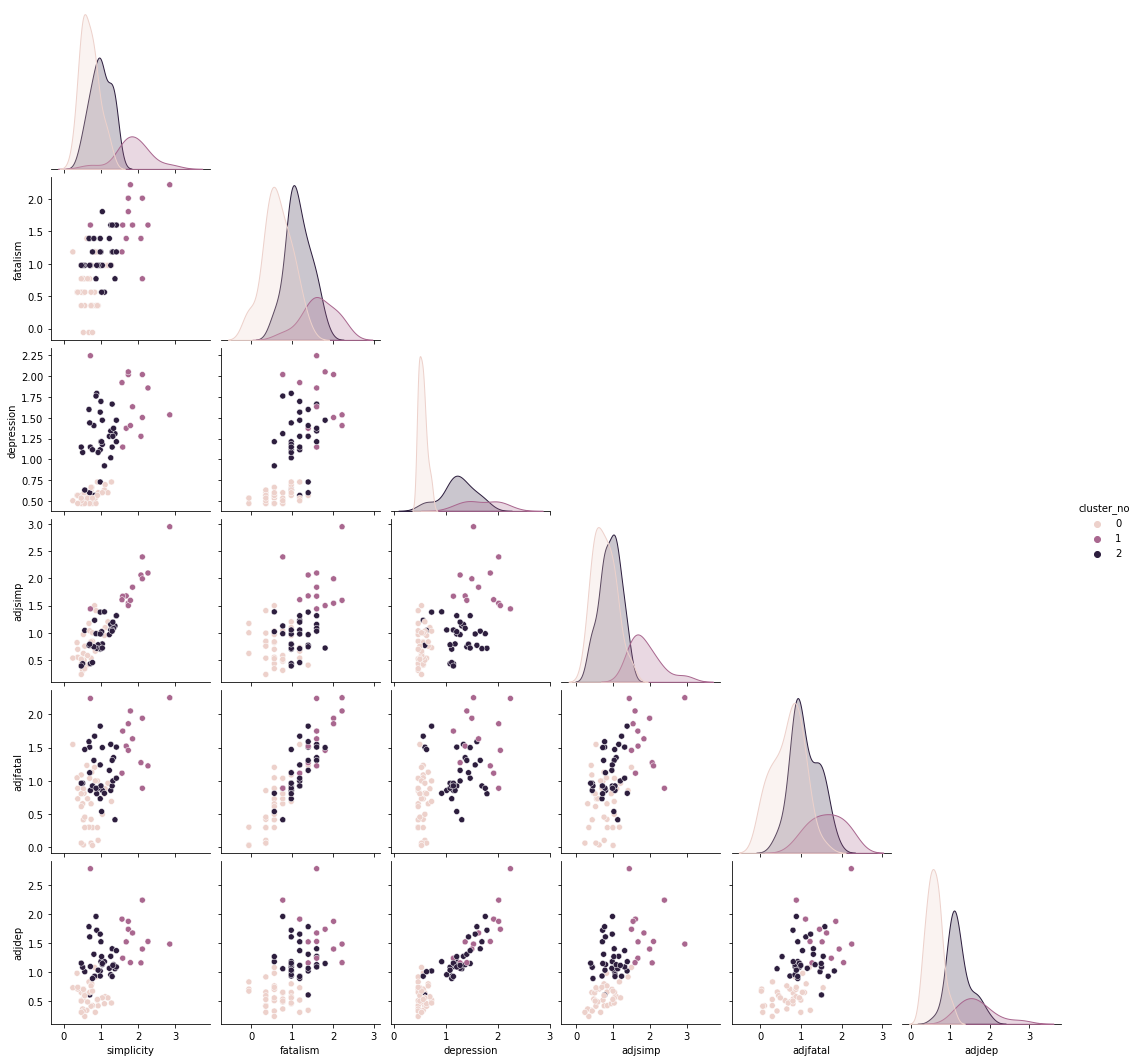

In [41]:
_ = sns.pairplot(mydata, diag_kind='kde', corner = True, hue = 'cluster_no') 

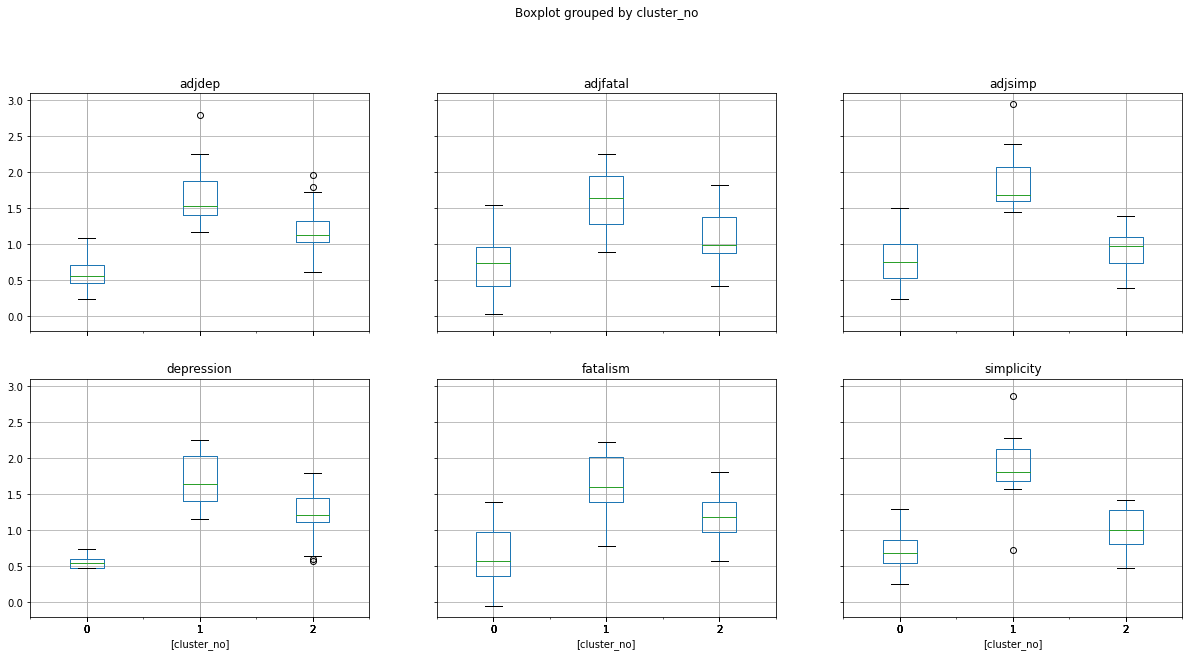

In [42]:
_ = mydata.boxplot(by = 'cluster_no',  layout=(3,3), figsize=(20, 15))

In [ ]:
## Trying ANOVA on depression to check out siginificance in difference between the clusters

In [ ]:
# s1 = mydata.loc[mydata['cluster_no'] == 0, 'depression'].values
# s2 = mydata.loc[mydata['cluster_no'] == 1, 'depression'].values
# s3 = mydata.loc[mydata['cluster_no'] == 2, 'depression'].values

In [ ]:
# from scipy import stats
# stats.f_oneway(s1,s2,s3)

In [ ]:
# alpha = 0.05

# if p < alpha --> then H0 (H0 means diff is not significant, mu1 = mu2 = mu3) is rejected --> difference IS significant !


In [ ]:
cluster0 = mydata[mydata.cluster_no == 0]
cluster0.describe().transpose()

In [ ]:
cluster1 = mydata[mydata.cluster_no == 1]
cluster1.describe().transpose()

In [ ]:
cluster1 = mydata[mydata.cluster_no == 2]
cluster1.describe().transpose()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# mydata_z_3 = mydata_z.iloc[:,0:3]

In [ ]:
# ## 3D plots of clusters
# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
# kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)
# kmeans.fit(mydata_z_3)
# labels = kmeans.labels_
# # choose any three columns 0,1,3 rd
# ax.scatter(mydata_z_3.iloc[:, 0], mydata_z_3.iloc[:, 1], mydata_z_3.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('simplicity')
# ax.set_ylabel('fatalism')
# ax.set_zlabel('depression')
# ax.set_title('3D plot of KMeans Clustering')

In [ ]:
####-------- further analysis of the data

In [ ]:
# # Let us try with K = 2
# final_model=KMeans(2)
# final_model.fit(mydata)
# prediction=final_model.predict(mydata)

# #Append the prediction 
# mydata["GROUP"] = prediction
# print("Groups Assigned : \n")
# mydata[["depression", "GROUP"]].head()

In [ ]:
# Now we have the cluster data (2clusters 0,1)
# we can build a SML model on this

In [ ]:
# H.W.
# try to fit a logisitic regression on the new dataset with cluster column (X,cluster)
# also fit SVM, KNN
# compare the models (score), which is the superioir model and why?
#Ideally LOR works better if there is overlapping in data

In [ ]:
# !pip install kmodes

In [ ]:
# import kmodes

### Kmode and DBscan

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7